### Sentiment Analysis using TextBlob
+ Dataset: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
        
#### Task
+ Confirming if the positive reviews are actually positive reviews using TextBlob

In [ ]:
# Note from EmreYbs:I finished a lovely course "Awesome Natural Language Processing Tools In Python" by
# Jesse E.Agbe(JCharis). This is one of the exercises we needed to complete. I recommend all courses by Jesse, in Udemy. 
# At first, his English accent can be a bit difficult to understand but then you get used to and his courses are very useful.

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load NLP Pkgs
from textblob import TextBlob

In [10]:
# Load Dataset
amz = pd.read_csv("sentiment labelled sentences/amazon_cells_labelled.txt",sep='\t',names=["Review","Label"])

In [11]:
amz.head()

,Review,Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [12]:
amz.columns

Index(['Review', 'Label'], dtype='object')

In [13]:
# Add the remaining dataset
imdb = pd.read_csv("sentiment labelled sentences/imdb_labelled.txt",sep='\t',names=["Review","Label"])

In [14]:
# Add the remaining dataset
yelp = pd.read_csv("sentiment labelled sentences/yelp_labelled.txt",sep='\t',names=["Review","Label"])

In [15]:
# Shape of Each Dataset
print("Amazon Reviews",amz.shape)
print("IMDB Reviews",imdb.shape)
print("Yelp Reviews",imdb.shape)

Amazon Reviews (1000, 2)
IMDB Reviews (748, 2)
Yelp Reviews (748, 2)


In [16]:
# Concat Dataset into one
df = pd.concat([amz,imdb,yelp],keys=['Amazon','IMDB','Yelp'])

In [17]:
df.head()

Review  Label
Amazon 0  So there is no way for me to plug it in here i...      0
       1                        Good case, Excellent value.      1
       2                             Great for the jawbone.      1
       3  Tied to charger for conversations lasting more...      0
       4                                  The mic is great.      1

In [18]:
df.columns

Index(['Review', 'Label'], dtype='object')

In [19]:
# Check for shape
df.shape

(2748, 2)

In [20]:
# Check for missing values
df.isnull().sum()

Review    0
Label     0
dtype: int64

In [21]:
# Check for Value Count
# Method 1 using value count
df['Label'].value_counts()

1    1386
0    1362
Name: Label, dtype: int64

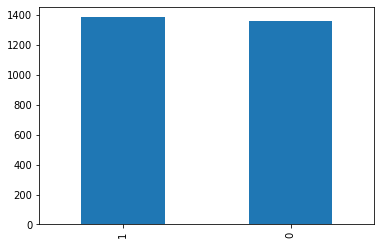

In [22]:
df['Label'].value_counts().plot(kind='bar')

In [ ]:
#### Narative
+ Balanced dataset

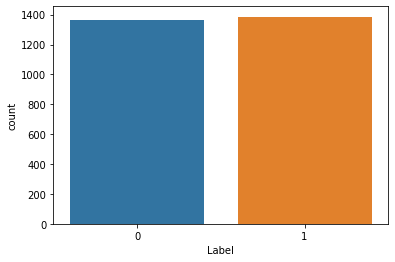

In [23]:
# Using Countplot
sns.countplot(df['Label'])

#### Sentiment Analysis
+ Do sentiment on each review
+ Confirm with our labels

In [24]:
def get_sentiment_labels(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment_label = 'Positive'
    elif sentiment_score < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_label

In [25]:
# Test fxn
get_sentiment_labels("I love apples so much")

'Positive'

In [26]:
# Apply Fxn to Reviews
df['Sentiment'] = df['Review'].apply(get_sentiment_labels)

In [27]:
df.head()

Review  Label Sentiment
Amazon 0  So there is no way for me to plug it in here i...      0   Neutral
       1                        Good case, Excellent value.      1  Positive
       2                             Great for the jawbone.      1  Positive
       3  Tied to charger for conversations lasting more...      0  Positive
       4                                  The mic is great.      1  Positive

In [28]:
df[['Label','Sentiment']]

Label Sentiment
Amazon 0        0   Neutral
       1        1  Positive
       2        1  Positive
       3        0  Positive
       4        1  Positive
...           ...       ...
Yelp   995      0   Neutral
       996      0   Neutral
       997      0  Negative
       998      0  Positive
       999      0  Negative

[2748 rows x 2 columns]

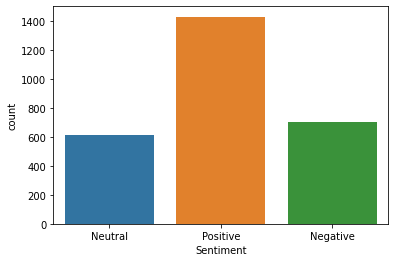

In [29]:
# Count Plot
sns.countplot(df['Sentiment'])

In [30]:
# Check Value Counts For Sentiment
df['Sentiment'].value_counts()

Positive    1432
Negative     705
Neutral      611
Name: Sentiment, dtype: int64

In [32]:
# Fetch All the neutral
df[df['Sentiment'] == 'Neutral']['Review']

Amazon  0      So there is no way for me to plug it in here i...
        7            If you are Razr owner...you must have this!
        16                   I advise EVERYONE DO NOT BE FOOLED!
        20     I went on Motorola's website and followed all ...
        24     I bought it for my mother and she had a proble...
                                     ...                        
Yelp    979    I kept looking at the time and it had soon bec...
        989    I would avoid this place if you are staying in...
        991           Spend your money and time some place else.
        995    I think food should have flavor and texture an...
        996                             Appetite instantly gone.
Name: Review, Length: 611, dtype: object

In [36]:
# Compare and confirm for true positive reviews
df[(df['Sentiment'] == 'Positive') & (df['Label'] == 1)]

Review  Label Sentiment
Amazon 1                          Good case, Excellent value.      1  Positive
       2                               Great for the jawbone.      1  Positive
       4                                    The mic is great.      1  Positive
       10                     And the sound quality is great.      1  Positive
       11   He was very impressed when going from the orig...      1  Positive
...                                                       ...    ...       ...
Yelp   899                       Overall, a great experience.      1  Positive
       901  Their regular toasted bread was equally satisf...      1  Positive
       907  The chips and sals a here is amazing!!!!!!!!!!...      1  Positive
       909              This is my new fav Vegas buffet spot.      1  Positive
       922  Every time I eat here, I see caring teamwork t...      1  Positive

[1104 rows x 3 columns]

In [37]:
# Number of True Positive Review and True Negative Reviews
print("Genuine Positive Reviews:: {}".format(df[(df['Sentiment'] == 'Positive') & (df['Label'] == 1)].shape))
print("Genuine Negative Reviews:: {}".format(df[(df['Sentiment'] == 'Negative') & (df['Label'] == 0)].shape))

Genuine Positive Reviews:: (1104, 3)
Genuine Negative Reviews:: (631, 3)


#### Find the Most Common Words in Negative and Positive Reviews
+ Find the most common words
+ Do a wordcloud

In [38]:
positive_rev = df[(df['Sentiment'] == 'Positive') & (df['Label'] == 1)]
negative_rev = df[(df['Sentiment'] == 'Negative') & (df['Label'] == 0)]

In [39]:
# Using Collections
from collections import Counter

In [41]:
# Remove Stopwords using Neattext
import neattext.functions as fxns

In [ ]:
fxns.remove_stopwords()

In [45]:
# Most Common Words in Positive Reviews
positive_rev['Clean_Review'] = positive_rev['Review'].str.lower().apply(fxns.remove_stopwords)
negative_rev['Clean_Review'] = negative_rev['Review'].str.lower().apply(fxns.remove_stopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
positive_rev[['Clean_Review','Review']]

Clean_Review  \
Amazon 1                          good case, excellent value.   
       2                                       great jawbone.   
       4                                           mic great.   
       10                                sound quality great.   
       11   impressed going original battery extended batt...   
...                                                       ...   
Yelp   899                         overall, great experience.   
       901  regular toasted bread equally satisfying occas...   
       907              chips sals amazing!!!!!!!!!!!!!!!!!!!   
       909                         new fav vegas buffet spot.   
       922  every time eat here, see caring teamwork profe...   

                                                       Review  
Amazon 1                          Good case, Excellent value.  
       2                               Great for the jawbone.  
       4                                    The mic is great.  
       10                     And the sound quality is great.  
       11   He was very impressed when going from the orig...  
...                                                       ...  
Yelp   899                       Overall, a great experience.  
       901  Their regular toasted bread was equally satisf...  
       907  The chips and sals a here is amazing!!!!!!!!!!...  
       909              This is my new fav Vegas buffet spot.  
       922  Every time I eat here, I see caring teamwork t...  

[1104 rows x 2 columns]

In [76]:
# Most Common Words
def get_most_common_words(text,num_words=30):
    most_common_tokens = Counter(text).most_common(num_words)
    result = [ word for word,wc in most_common_tokens ]
    return result

In [69]:
# A list of tokenized words in positive reviews
positive_corpus = [token for sentence in positive_rev['Clean_Review'].tolist() for token in sentence.split(' ')]

In [71]:
# Join All Rows as one
negative_corpus = [token for sentence in negative_rev['Clean_Review'].tolist() for token in sentence.split(' ')]

In [78]:
# Find the most common words
positive_most_common_words = get_most_common_words(positive_corpus,50)
negative_most_common_words = get_most_common_words(negative_corpus,50)

In [79]:
# What are the top most common positive words
print(positive_most_common_words)

['great', 'good', 'really', 'best', 'phone', 'love', 'movie', 'film', 'one', 'nice', 'food', 'excellent', 'works', '-', 'like', 'service', 'well', 'also', 'place', 'time', 'good.', 'sound', 'quality', "i've", 'pretty', 'great.', 'even', 'better', 'wonderful', 'happy', 'made', 'headset', 'recommend', 'loved', 'it.', 'battery', 'phone.', 'first', 'ever', 'friendly', 'highly', 'product', 'would', 'new', 'still', 'think', 'easy', 'get', 'worth', 'many']


In [80]:
# List of All Words for Negative
print(negative_most_common_words)

['bad', 'worst', 'movie', 'food', 'waste', 'like', 'phone', 'one', 'time', 'even', 'ever', 'service', 'place', 'really', 'little', 'bad.', 'poor', '-', 'disappointed', 'film', 'good', 'would', 'quality', 'terrible', 'way', 'it.', 'use', 'get', "i'm", "i've", 'service.', 'made', 'enough', 'time.', 'customer', 'also', 'could', 'much', 'awful.', '&', 'acting', 'make', 'long', 'disappointed.', 'horrible', 'never', 'stupid', 'came', 'real', 'slow']


In [81]:
### Word Cloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

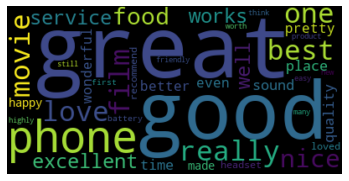

In [84]:
# Create A basic word cloud
wordcloud = WordCloud().generate(' '.join(positive_most_common_words))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

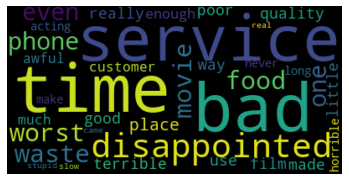

In [85]:
# Create A basic word cloud
wordcloud = WordCloud().generate(' '.join(negative_most_common_words))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

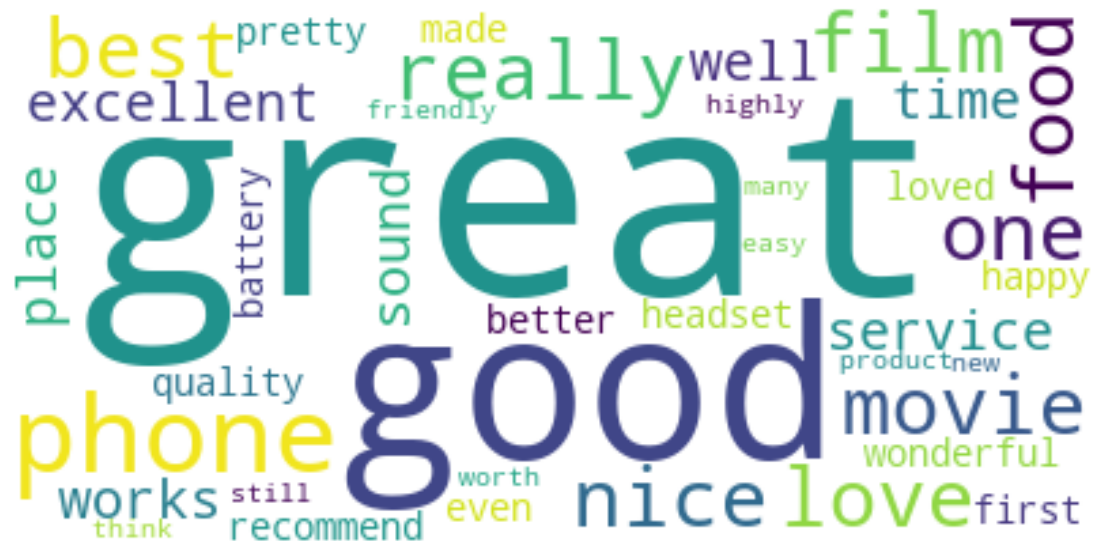

In [87]:
# Modifications
# Create A basic word cloud
wordcloud = WordCloud(max_words=100,background_color='white').generate(' '.join(positive_most_common_words))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
# Saving Image
wordcloud.to_file('positive_words_image.png')